## Adding Noise to the BlueTides Mock Image Catalogue - Example

This code gives a brief example on how to
- select galaxies from the 'BlueTidesMockImageCatalogue.csv' file (see plot_selected_galaxies.ipynb for more details)
- add noise to the images
- plot the noise-less and noisy images

Note that the key functions can be found in add_noise.py if you wish to make any modifications, in particular adding addional noise levels. If add_noise.py and bluetides_mock_catalogue_functions.py are not in the current directory, you will need to add their directory to your PYTHONPATH.


To run this code as-is, this requires the files:

- hlsp_bluetides_multi_multi_all_multi_v1_sim.csv  

- hlsp_bluetides_jwst_nircam_z7-file1_f150w_v1_sim-psf.fits
- hlsp_bluetides_vista_vircam_z7-file1_y_v1_sim-psf.fits

- jwst_nircam_depths.csv

You will need to specify the directories that contain these files.


In [1]:
image_path = '/home/mmarshal/FinalImages/FullCatalogue/' 
#directory containing fits files and the hlsp csv catalogue
jwst_filepath = '~/FinalImages/' 
#directory containing jwst_nircam_depths.csv

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
from astropy.io import fits

import bluetides_mock_catalogue_functions as mock_functions
import add_noise

Load in the catalogue as a Catalogue object. This requires specifying the directory which contains both the 'hlsp_bluetides_multi_multi_all_multi_v1_sim.csv' file and the catalogue fits images, 'image_path'. In this case we choose z=7.

In [3]:
z=7
cat=mock_functions.Catalogue(z=z,image_path=image_path)

Select three galaxies based on their indices.

In [4]:
cat.select_galaxies_with_indices([240,515,3701])
cat.catalogueSelected

,redshift,fileNumber,extensionNumber,stellarMass,BHmass,BHluminosity,haloMass,lum_FUV,flux_jwst.nircam.f090w,radius_jwst.nircam.f090w,...,flux_vista.vircam.y,radius_vista.vircam.y,flux_vista.vircam.j,radius_vista.vircam.j,flux_vista.vircam.h,radius_vista.vircam.h,flux_vista.vircam.ks,radius_vista.vircam.ks,flux_spitzer.irac.ch1,flux_spitzer.irac.ch2
240,7.0,1,241,4.670138e+10,138758060.0,3.900770e+45,1.332076e+12,3.601339e+29,22.038994,1.265224,...,210.564529,2.300032,208.807938,2.300032,231.783096,2.241794,229.303848,2.241794,484.205200,523.094482
515,7.0,1,516,1.204752e+10,44596010.0,1.852940e+45,3.497844e+11,9.011230e+28,13.434932,1.143827,...,102.919060,2.057211,108.351852,2.057211,120.338409,2.057211,125.089157,1.991886,260.110931,297.770020
3701,7.0,1,3702,5.035402e+09,4998380.5,2.257284e+44,3.931238e+11,1.863760e+29,19.357805,1.312985,...,130.007187,2.120525,152.237396,2.120525,168.376709,2.120525,180.720215,2.057211,336.624664,374.237793


Now load in the images of these specific galaxies from the BlueTides Mock Image Catalogue. First we'll choose the JWST NIRCam F150W filter.

<IPython.core.display.Javascript object>


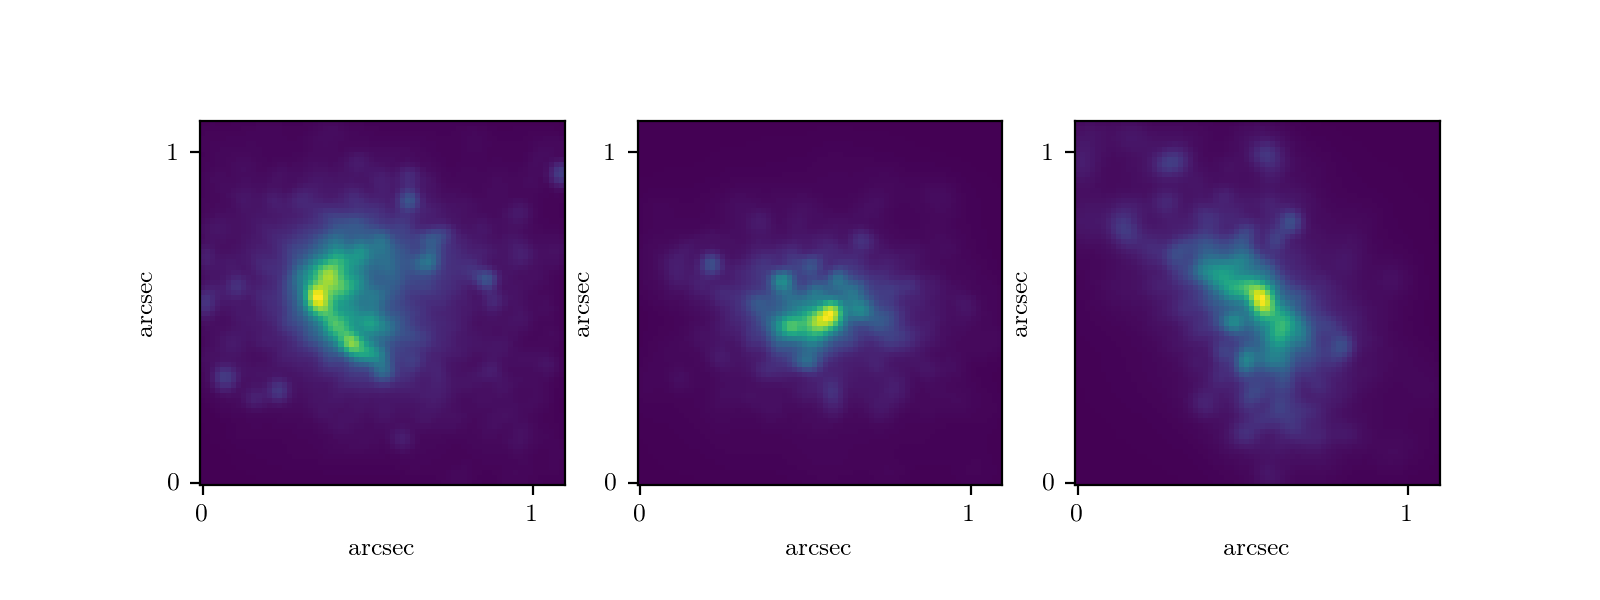

In [5]:
image = add_noise.Image(cat,'jwst','nircam','f150w') 
#set up an Image object, which will be a JWST NIRCam F150W image of the galaxies 
#in cat.catalogueSelected.

image.get_image_params() #load in image parameters from the fits header
image.open_fits() #open the fits data file

fig = image.plot_noiseless_images()

Add noise to the images, corresponding to a 10ks exposure.

<IPython.core.display.Javascript object>


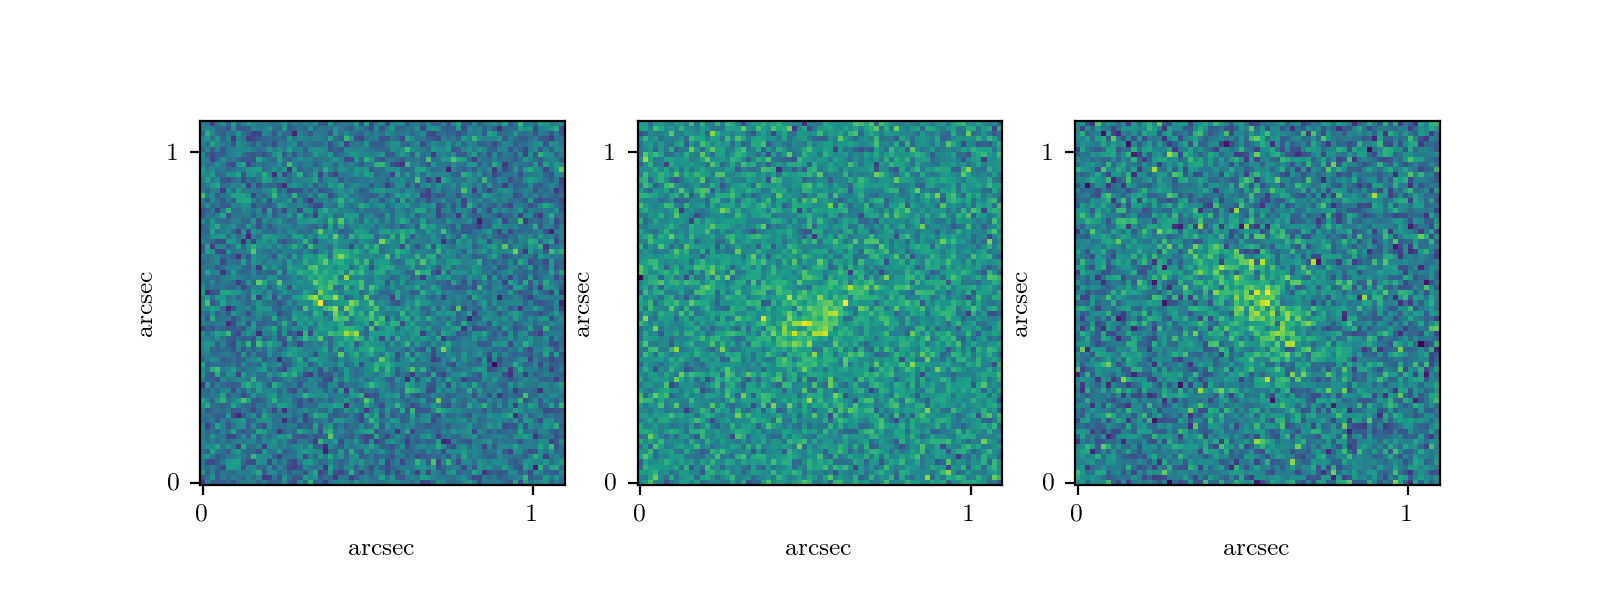

In [6]:
image.get_aperture_limits(jwst_filepath) 
#Load in the noise levels for jwst images

exp_time = 10000 #seconds
image.add_noise(exp_time)
#Add noise corresponding to a 10ks exposure.

fig = image.plot_noisy_images()

Load in the images of these specific galaxies from the BlueTides Mock Image Catalogue, this time for the VISTA VIRCAM Y filter.

<IPython.core.display.Javascript object>


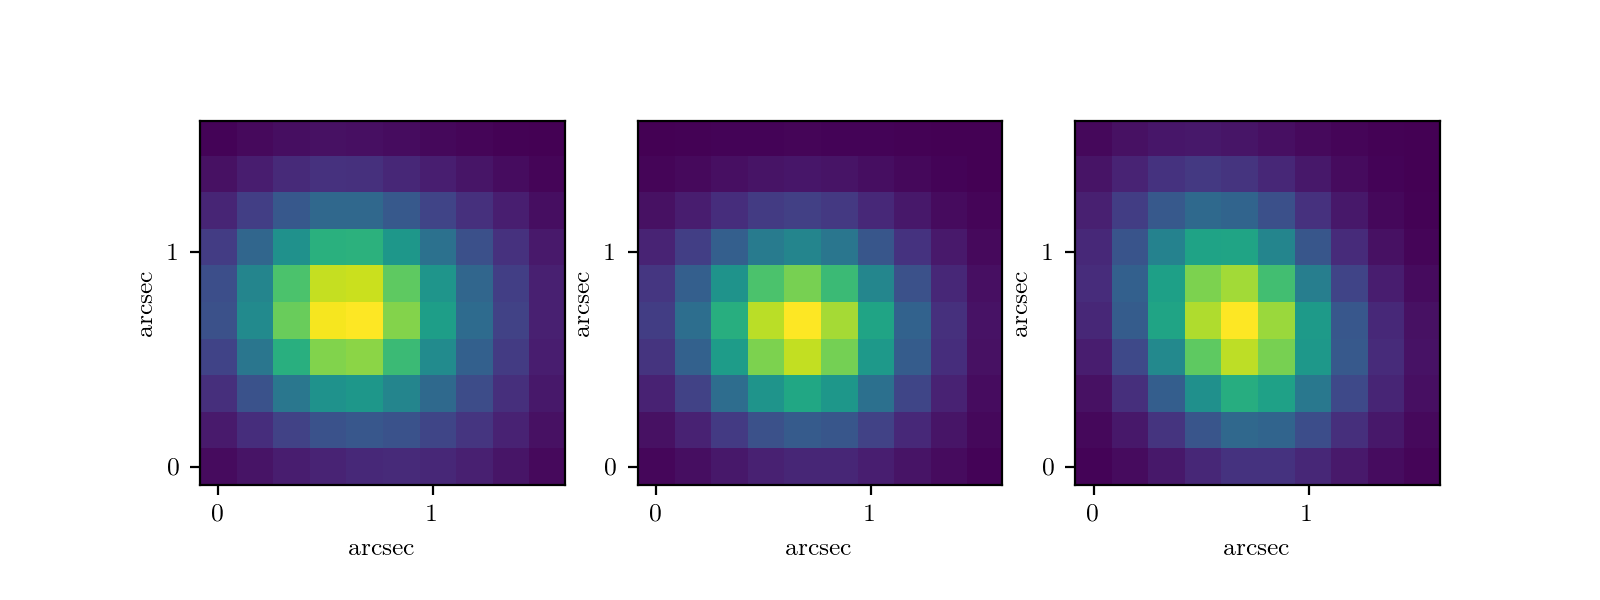

In [7]:
image = add_noise.Image(cat,'vista','vircam','y')
image.get_image_params()
image.open_fits()

fig = image.plot_noiseless_images()

Add noise to the images, corresponding to a 10ks exposure.

<IPython.core.display.Javascript object>


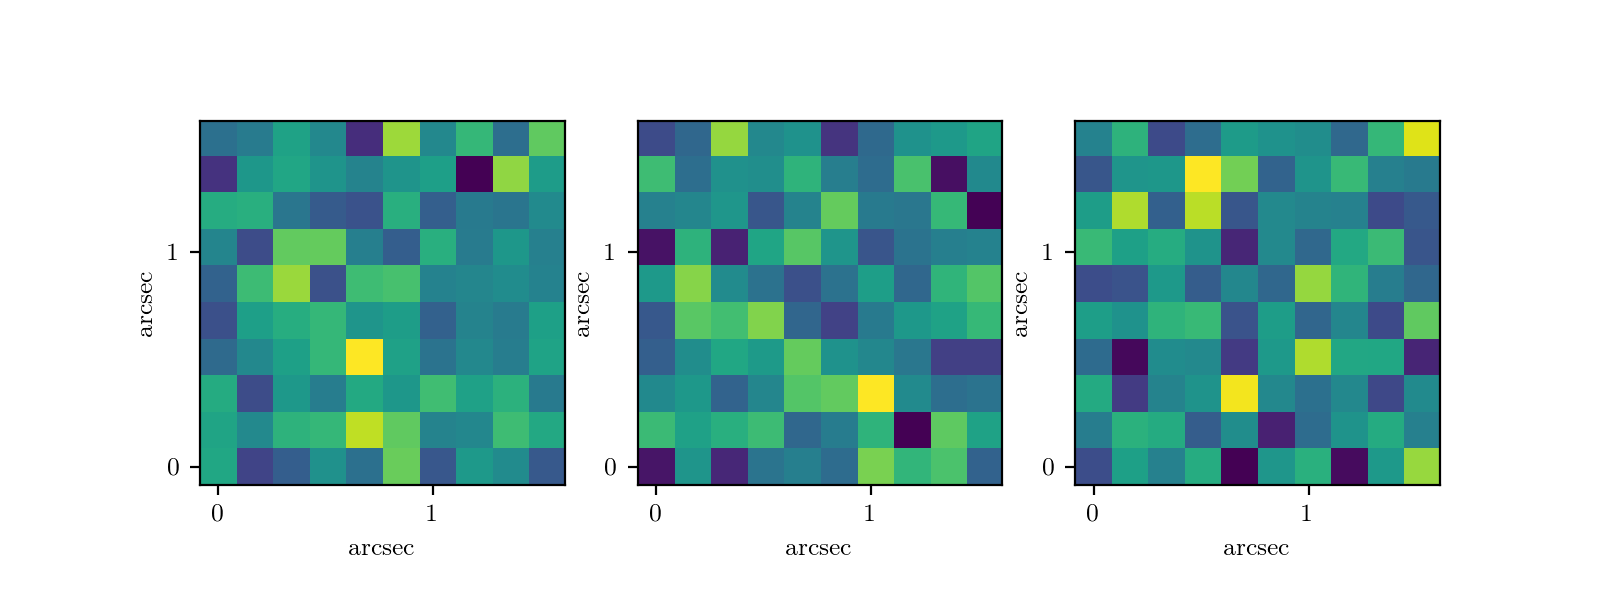

In [8]:
image.get_aperture_limits()

exp_time = 10000 #seconds
image.add_noise(exp_time)
#Add noise corresponding to a 10ks exposure.

fig = image.plot_noisy_images()

Clearly there is quite a difference between JWST and VISTA!